### Importing Libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler


### Importing Data and analysing data

In [3]:
data=pd.read_csv('day.csv')

In [4]:
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
data.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [6]:
data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
instant       730 non-null int64
dteday        730 non-null object
season        730 non-null int64
yr            730 non-null int64
mnth          730 non-null int64
holiday       730 non-null int64
weekday       730 non-null int64
workingday    730 non-null int64
weathersit    730 non-null int64
temp          730 non-null float64
atemp         730 non-null float64
hum           730 non-null float64
windspeed     730 non-null float64
casual        730 non-null int64
registered    730 non-null int64
cnt           730 non-null int64
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


### Data Preparation

In [8]:
## Our aim is to find significant features from the dataset which add value to the target
## Here registered and casual column indicates number of bike rentals in appropriate way
## As cnt=registered + casual
## In order to get the significant variables to find the demand, let's drop these two columns first

In [9]:
data.drop(['registered','casual'],axis=1,inplace=True)

In [10]:
pd.unique(data['season'])

array([1, 2, 3, 4], dtype=int64)

In [11]:
pd.unique(data['weathersit'])

array([2, 1, 3], dtype=int64)

In [12]:
## Convert season and weathersit features into appropriate categories

In [13]:
def season(x):
    return x.map({1:'spring',2:'summer',3:'fall',4:'winter'})
def weathersit(x):
    return x.map({1:'Clear_Few clouds',2:'Mist_Cloudy',3:'Light Snow_Rain_Thunderstorm',4:'Heavy Rain_Ice Pallets'})

In [14]:

data[['season']]=data[['season']].apply(season)
data[['weathersit']]=data[['weathersit']].apply(weathersit)

### Visualizing Data

In [15]:
data.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

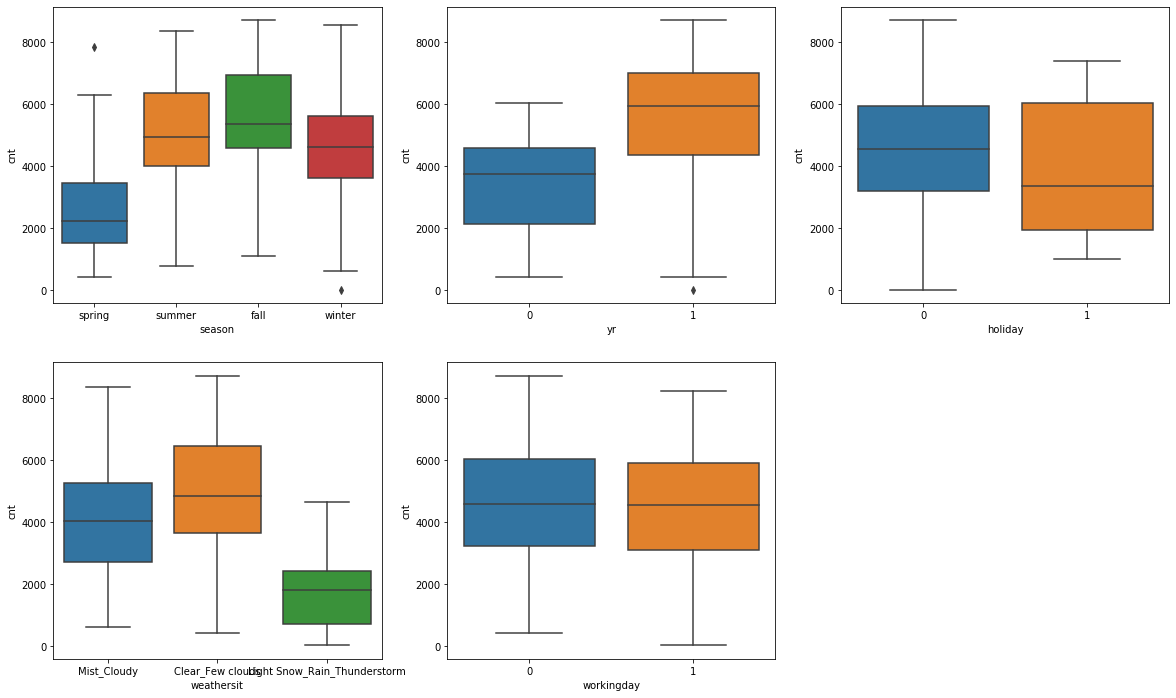

In [16]:
plt.figure(figsize=[20,12])
plt.subplot(2,3,1)
sns.boxplot(x='season',y='cnt',data=data)
plt.subplot(2,3,2)
sns.boxplot(x='yr',y='cnt',data=data)
plt.subplot(2,3,3)
sns.boxplot(x='holiday',y='cnt',data=data)
plt.subplot(2,3,4)
sns.boxplot(x='weathersit',y='cnt',data=data)
plt.subplot(2,3,5)
sns.boxplot(x='workingday',y='cnt',data=data)

In [17]:
## We can observe that there are no outliers in the categorical data

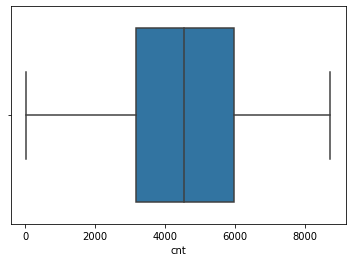

In [18]:
sns.boxplot(data.cnt)

In [19]:
## We can also observe that there are no outliers in target variable 
# So we can proceed with data preparation

In [20]:
data.shape

(730, 14)

In [21]:
data.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

In [22]:
# Let's plot a pair plot for numerical analysis
pair_plot=['temp','atemp','hum','windspeed','cnt']

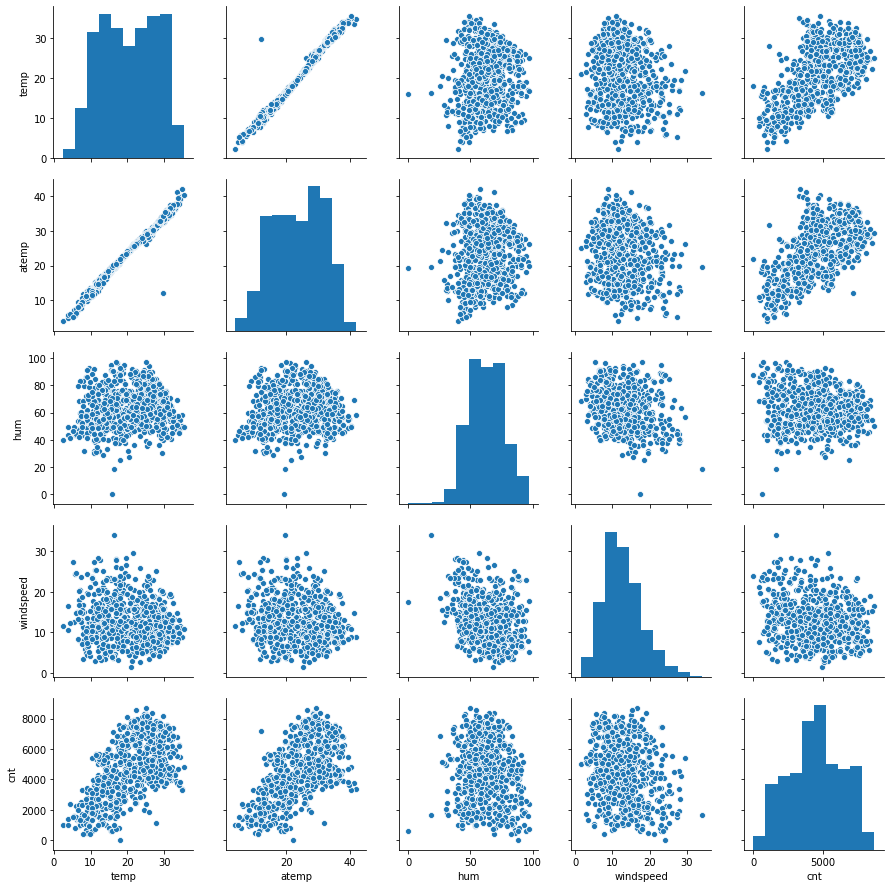

In [23]:
sns.pairplot(data[pair_plot])

In [24]:
## We can observe that temp and atemp are highly correlated, so we might need to drop either of them to avoid multicollinearity
## Also temp and atemp are correlated with target variable

In [25]:
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,01-01-2018,spring,0,1,0,1,1,Mist_Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,2,02-01-2018,spring,0,1,0,2,1,Mist_Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,3,03-01-2018,spring,0,1,0,3,1,Clear_Few clouds,8.050924,9.47025,43.7273,16.636703,1349
3,4,04-01-2018,spring,0,1,0,4,1,Clear_Few clouds,8.200000,10.60610,59.0435,10.739832,1562
4,5,05-01-2018,spring,0,1,0,5,1,Clear_Few clouds,9.305237,11.46350,43.6957,12.522300,1600


### Adding Dummies

In [26]:
temp=pd.get_dummies(data['season'])

In [27]:
temp.head()

,fall,spring,summer,winter
0,0,1,0,0
1,0,1,0,0
2,0,1,0,0
3,0,1,0,0
4,0,1,0,0


In [28]:
temp=pd.get_dummies(data['season'],drop_first=True)

In [29]:
temp.head()

,spring,summer,winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [30]:
data=pd.concat([data,temp],axis=1)

In [31]:
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,spring,summer,winter
0,1,01-01-2018,spring,0,1,0,1,1,Mist_Cloudy,14.110847,18.18125,80.5833,10.749882,985,1,0,0
1,2,02-01-2018,spring,0,1,0,2,1,Mist_Cloudy,14.902598,17.68695,69.6087,16.652113,801,1,0,0
2,3,03-01-2018,spring,0,1,0,3,1,Clear_Few clouds,8.050924,9.47025,43.7273,16.636703,1349,1,0,0
3,4,04-01-2018,spring,0,1,0,4,1,Clear_Few clouds,8.200000,10.60610,59.0435,10.739832,1562,1,0,0
4,5,05-01-2018,spring,0,1,0,5,1,Clear_Few clouds,9.305237,11.46350,43.6957,12.522300,1600,1,0,0


In [32]:
data=data.drop('season',axis=1)

In [33]:
temp=pd.get_dummies(data['weathersit'])

In [34]:
temp.head()

,Clear_Few clouds,Light Snow_Rain_Thunderstorm,Mist_Cloudy
0,0,0,1
1,0,0,1
2,1,0,0
3,1,0,0
4,1,0,0


In [35]:
pd.unique(data['weathersit'])

array(['Mist_Cloudy', 'Clear_Few clouds', 'Light Snow_Rain_Thunderstorm'],
      dtype=object)

In [36]:
# Since we have only 3 columns in temp no need to drop first row
## This means in this data only three weathersits are listed which means 
## we don't have data related to other weathersit as there might not be any users in that weathersit: Heavy rain-ThunderStrom
## Which is obvious that a person wouldn't like to travel with bike during heavy, so there aren't any data in heavy rain

In [37]:
data=pd.concat([data,temp],axis=1)

In [38]:
data=data.drop('weathersit',axis=1)

In [39]:
data.head()

,instant,dteday,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,Clear_Few clouds,Light Snow_Rain_Thunderstorm,Mist_Cloudy
0,1,01-01-2018,0,1,0,1,1,14.110847,18.18125,80.5833,10.749882,985,1,0,0,0,0,1
1,2,02-01-2018,0,1,0,2,1,14.902598,17.68695,69.6087,16.652113,801,1,0,0,0,0,1
2,3,03-01-2018,0,1,0,3,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,1,0,0
3,4,04-01-2018,0,1,0,4,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,1,0,0
4,5,05-01-2018,0,1,0,5,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,1,0,0


In [40]:
temp=pd.get_dummies(data['mnth'],prefix='month',drop_first=True)

In [41]:
temp.head()

,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0


In [42]:
data=pd.concat([data,temp],axis=1)

In [43]:
data.drop('mnth',axis=1,inplace=True)

In [44]:
# create a weekend variable to indicate the weekend status 

In [45]:
data['weekend']=data['weekday'].map(lambda x: 1 if x==6 or x==7 else 0)

In [46]:
data.columns

Index(['instant', 'dteday', 'yr', 'holiday', 'weekday', 'workingday', 'temp',
       'atemp', 'hum', 'windspeed', 'cnt', 'spring', 'summer', 'winter',
       'Clear_Few clouds', 'Light Snow_Rain_Thunderstorm', 'Mist_Cloudy',
       'month_2', 'month_3', 'month_4', 'month_5', 'month_6', 'month_7',
       'month_8', 'month_9', 'month_10', 'month_11', 'month_12', 'weekend'],
      dtype='object')

In [47]:
data['weekend'].head()

0    0
1    0
2    0
3    0
4    0
Name: weekend, dtype: int64

In [48]:
# We can drop 'instant variable as it is the unique row'

In [49]:
data.drop('instant',inplace=True,axis=1)

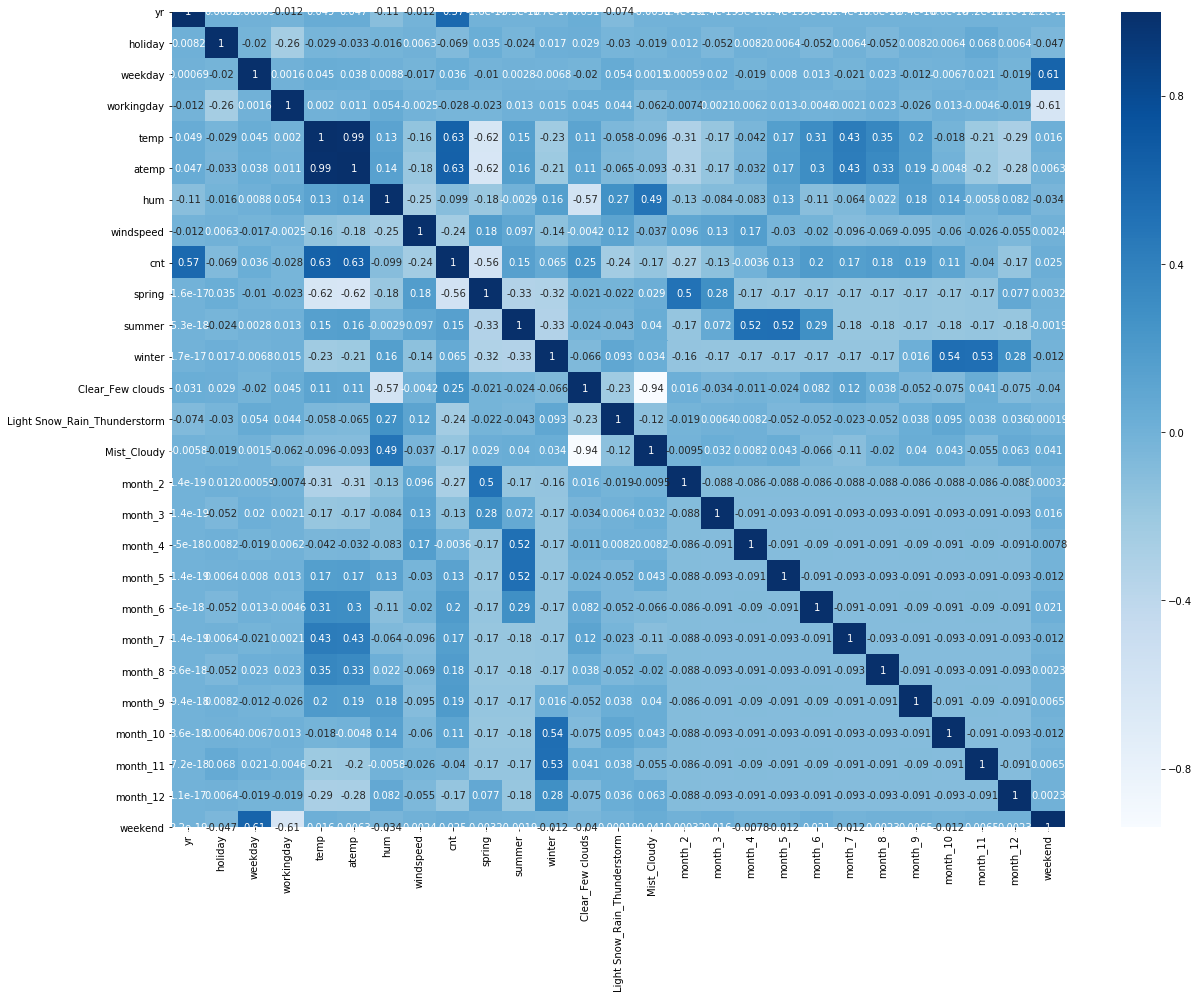

In [50]:
plt.figure(figsize = (20, 15))
sns.heatmap(data.corr(),cmap='Blues',annot=True)
plt.show()

In [51]:
## This is difficult to observe collinearity with heatmap of complete data 
## So we can go for pairplot with limited columns for better data understanding

In [52]:
## We can give a quick insight of temp, atemp related to cnt
## cnt is correlated with year to, this may mean that people using this sharing scheme might have increased over year
## Also we can observe that target variable is negatively correlated to spring season
## Consequently people might not have preferred bikes during spring 
## For now with this we can get to a thought that we need to drop temp or atemp from the data to avoid multicollinearity
## as no of users may also depend upon temp  
## Let's just not drop them directly as we can also get better insight once we build a basic model and go for VIF 


In [53]:
data.columns

Index(['dteday', 'yr', 'holiday', 'weekday', 'workingday', 'temp', 'atemp',
       'hum', 'windspeed', 'cnt', 'spring', 'summer', 'winter',
       'Clear_Few clouds', 'Light Snow_Rain_Thunderstorm', 'Mist_Cloudy',
       'month_2', 'month_3', 'month_4', 'month_5', 'month_6', 'month_7',
       'month_8', 'month_9', 'month_10', 'month_11', 'month_12', 'weekend'],
      dtype='object')

In [54]:
data.head()

,dteday,yr,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,...,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,weekend
0,01-01-2018,0,0,1,1,14.110847,18.18125,80.5833,10.749882,985,...,0,0,0,0,0,0,0,0,0,0
1,02-01-2018,0,0,2,1,14.902598,17.68695,69.6087,16.652113,801,...,0,0,0,0,0,0,0,0,0,0
2,03-01-2018,0,0,3,1,8.050924,9.47025,43.7273,16.636703,1349,...,0,0,0,0,0,0,0,0,0,0
3,04-01-2018,0,0,4,1,8.200000,10.60610,59.0435,10.739832,1562,...,0,0,0,0,0,0,0,0,0,0
4,05-01-2018,0,0,5,1,9.305237,11.46350,43.6957,12.522300,1600,...,0,0,0,0,0,0,0,0,0,0


In [55]:
## We can drop dteday as it just indicates the date of booking and not have much correlation with cnt
## We can drop weekday column as we have added weekend column to indicate further details

In [56]:
data.drop('dteday',axis=1,inplace=True)

In [57]:
data.drop('weekday',axis=1,inplace=True)

In [58]:
data.shape

(730, 26)

### Model Building

In [59]:
## Splitting train and test datasets
## Let's try for the mostly used splitting range 7:3 for training and testing dataset

In [60]:
train_df,test_df=train_test_split(data,train_size=0.7,test_size=0.3,random_state=100)

In [61]:
## I am using MinMaxScaler and not for StandardScaler
## for this dataset as the data seems to have a variation in numeric range in each column
## Also I would like to avoid negative values in this dataset which may make be clumsy for observation

In [62]:
Scaler=MinMaxScaler()
num_data=['temp','atemp','hum','windspeed','cnt']
train_df[num_data]=Scaler.fit_transform(train_df[num_data])

In [63]:
y_train=train_df.pop('cnt')
X_train=train_df

In [64]:
## Training model using statsmodels.api

In [65]:
from sklearn.feature_selection import RFE
lm=LinearRegression()
lm.fit(X_train,y_train)
rfe=RFE(lm,15)
rfe = rfe.fit(X_train,y_train)

In [66]:
col=X_train.columns[rfe.support_]

In [67]:
col

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'spring', 'summer',
       'winter', 'Clear_Few clouds', 'Light Snow_Rain_Thunderstorm',
       'Mist_Cloudy', 'month_3', 'month_8', 'month_9', 'month_10'],
      dtype='object')

In [68]:
lm.score(X_train,y_train)

0.848665878657833

In [69]:
X_train=X_train[col]

In [70]:
X_train_sm=sm.add_constant(X_train)
lr=sm.OLS(y_train,X_train).fit()

In [71]:
lr.params

yr                              0.229702
holiday                        -0.090301
temp                            0.495171
hum                            -0.170179
windspeed                      -0.185711
spring                         -0.036642
summer                          0.085070
winter                          0.113720
Clear_Few clouds                0.268696
Light Snow_Rain_Thunderstorm    0.021999
Mist_Cloudy                     0.212762
month_3                         0.028540
month_8                         0.050642
month_9                         0.120374
month_10                        0.042113
dtype: float64

In [72]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     192.2
Date:                Wed, 07 Jul 2021   Prob (F-statistic):          9.02e-190
Time:                        17:17:52   Log-Likelihood:                 513.33
No. Observations:                 510   AIC:                            -996.7
Df Residuals:                     495   BIC:                            -933.1
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
yr                               0.2297      0.008     28.400      0.000       0.214       0.246
holiday                         -0.0903      0.025     -3.543      0.000      -0.140      -0.040
temp                             0.4952      0.034     14.582      0.000       0.428       0.562
hum                             -0.1702      0.038     -4.519      0.000      -0.244      -0.096
windspeed                       -0.1857      0.026     -7.241      0.000      -0.236      -0.135
spring                          -0.0366      0.023     -1.618      0.106      -0.081       0.008
summer                           0.0851      0.016      5.202      0.000       0.053       0.117
winter                           0.1137      0.020      5.675      0.000       0.074       0.153
Clear_Few clouds                 0.2687      0.035      7.622      0.000       0.199       0.338
Light Snow_Rain_Thunderstorm     0.0220      0.047      0.468      0.640      -0.070       0.114
Mist_Cloudy                      0.2128      0.039      5.496      0.000       0.137       0.289
month_3                          0.0285      0.014      1.975      0.049       0.000       0.057
month_8                          0.0506      0.017      2.897      0.004       0.016       0.085
month_9                          0.1204      0.017      6.966      0.000       0.086       0.154
month_10                         0.0421      0.017      2.414      0.016       0.008       0.076
==============================================================================
Omnibus:                       72.046   Durbin-Watson:                   2.030
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              169.620
Skew:                          -0.742   Prob(JB):                     1.47e-37
Kurtosis:                       5.404   Cond. No.                         26.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [73]:
## By looking at the summary it seems good with Rsquared and Adjusted Rsquared as 0.84
## But pvalues are high for few features, we can still reduce no of features 
## Let's try predicting the test set 

In [74]:
## Use transform with the same scaler object used for the numerical columns as in train data for proper analysis
num_data=['temp','atemp','hum','windspeed','cnt']
test_df[num_data]=Scaler.transform(test_df[num_data])

In [75]:
y_test=test_df.pop('cnt')
X_test=test_df

In [76]:
X_test=X_test[col]

In [77]:
X_test_sm=sm.add_constant(X_test)
y_pred=lr.predict(X_test)

In [78]:
from sklearn.metrics import mean_squared_error, r2_score

In [79]:
mse = mean_squared_error(y_test, y_pred)

r_squared = r2_score(y_test, y_pred)

In [80]:
rmse= mse**(1/2)

In [81]:
rmse

0.09262048821533898

In [82]:
mse

0.008578554837247747

In [83]:
r_squared

0.8193829061692349

Text(0.5, 0, 'Errors')

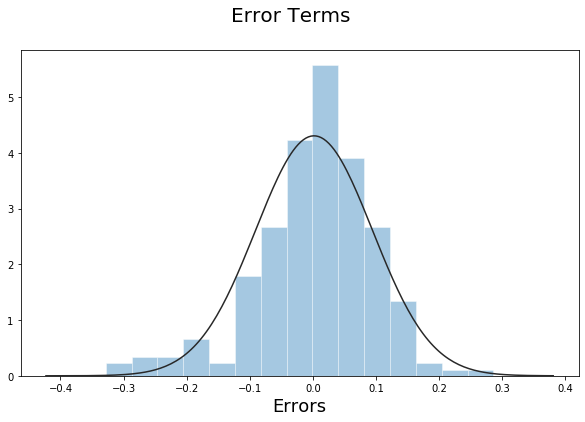

In [84]:
from scipy.stats import norm
fig = plt.figure(figsize=[10,6])
sns.distplot((y_test - y_pred), bins = 15,fit=norm,kde=False,hist_kws=dict(edgecolor='w'))
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)      

In [85]:
## we can observe that r2_score for the test is also 0.81 which is quite good also rmse is low 0.09
## But we still need to make sure if this model is good 

In [86]:
## Let's check VIF to check if there is any multicollinearity in the data 

In [87]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,Clear_Few clouds,49.36
10,Mist_Cloudy,32.54
5,spring,5.97
7,winter,4.75
9,Light Snow_Rain_Thunderstorm,4.12
2,temp,3.72
6,summer,3.13
3,hum,1.91
12,month_8,1.68
14,month_10,1.52


In [88]:
## We can observe that there is high collinearity between the predictors 
## We have 2 predictors above 10 VIF which can make this model unstable in further datasets 

In [89]:
# Clear_Few clouds and Mist_Cloudy have high vif but pvalue for both is 0
## Let's try dropping Clear_Few clouds

In [90]:
X_train_1=X_train.copy()

In [91]:
X_train_1.drop('Clear_Few clouds',axis=1,inplace=True)

In [92]:
X_train_sm=sm.add_constant(X_train_1)
lr_2=sm.OLS(y_train,X_train_sm).fit()
lr_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     192.2
Date:                Wed, 07 Jul 2021   Prob (F-statistic):          9.02e-190
Time:                        17:17:58   Log-Likelihood:                 513.33
No. Observations:                 510   AIC:                            -996.7
Df Residuals:                     495   BIC:                            -933.1
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            0.2687      0.035      7.622      0.000       0.199       0.338
yr                               0.2297      0.008     28.400      0.000       0.214       0.246
holiday                         -0.0903      0.025     -3.543      0.000      -0.140      -0.040
temp                             0.4952      0.034     14.582      0.000       0.428       0.562
hum                             -0.1702      0.038     -4.519      0.000      -0.244      -0.096
windspeed                       -0.1857      0.026     -7.241      0.000      -0.236      -0.135
spring                          -0.0366      0.023     -1.618      0.106      -0.081       0.008
summer                           0.0851      0.016      5.202      0.000       0.053       0.117
winter                           0.1137      0.020      5.675      0.000       0.074       0.153
Light Snow_Rain_Thunderstorm    -0.2467      0.026     -9.338      0.000      -0.299      -0.195
Mist_Cloudy                     -0.0559      0.010     -5.342      0.000      -0.077      -0.035
month_3                          0.0285      0.014      1.975      0.049       0.000       0.057
month_8                          0.0506      0.017      2.897      0.004       0.016       0.085
month_9                          0.1204      0.017      6.966      0.000       0.086       0.154
month_10                         0.0421      0.017      2.414      0.016       0.008       0.076
==============================================================================
Omnibus:                       72.046   Durbin-Watson:                   2.030
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              169.620
Skew:                          -0.742   Prob(JB):                     1.47e-37
Kurtosis:                       5.404   Cond. No.                         20.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [93]:
## We can see that still after removing 'atemp' we have rsquared value unchanged 
## Let's check the VIF again 

In [94]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train_1.columns
vif['VIF'] = [variance_inflation_factor(X_train_1.values, i) for i in range(X_train_1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,29.49
2,temp,15.32
5,spring,4.70
4,windspeed,4.69
7,winter,4.33
6,summer,3.26
9,Mist_Cloudy,2.29
0,yr,2.09
11,month_8,1.80
13,month_10,1.61


In [95]:
## Let's drop the other feature 'hum' which have next high vif

In [96]:
X_train_2=X_train_1.copy()

In [97]:
X_train_2.drop('hum',axis=1,inplace=True)

In [98]:
X_train_sm=sm.add_constant(X_train_2)
lr_3=sm.OLS(y_train,X_train_sm).fit()
lr_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     197.7
Date:                Wed, 07 Jul 2021   Prob (F-statistic):          1.33e-186
Time:                        17:17:59   Log-Likelihood:                 503.02
No. Observations:                 510   AIC:                            -978.0
Df Residuals:                     496   BIC:                            -918.8
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            0.1874      0.031      6.063      0.000       0.127       0.248
yr                               0.2338      0.008     28.539      0.000       0.218       0.250
holiday                         -0.0909      0.026     -3.497      0.001      -0.142      -0.040
temp                             0.4589      0.034     13.643      0.000       0.393       0.525
windspeed                       -0.1522      0.025     -6.081      0.000      -0.201      -0.103
spring                          -0.0514      0.023     -2.252      0.025      -0.096      -0.007
summer                           0.0741      0.016      4.493      0.000       0.042       0.106
winter                           0.0956      0.020      4.778      0.000       0.056       0.135
Light Snow_Rain_Thunderstorm    -0.2933      0.025    -11.829      0.000      -0.342      -0.245
Mist_Cloudy                     -0.0830      0.009     -9.476      0.000      -0.100      -0.066
month_3                          0.0318      0.015      2.161      0.031       0.003       0.061
month_8                          0.0452      0.018      2.541      0.011       0.010       0.080
month_9                          0.1104      0.017      6.321      0.000       0.076       0.145
month_10                         0.0395      0.018      2.225      0.027       0.005       0.074
==============================================================================
Omnibus:                       72.205   Durbin-Watson:                   2.035
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              171.532
Skew:                          -0.741   Prob(JB):                     5.65e-38
Kurtosis:                       5.424   Cond. No.                         18.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [99]:
## After dropping hum column, rsquared is affected a little 
## Let's check VIF again

In [100]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train_2.columns
vif['VIF'] = [variance_inflation_factor(X_train_2.values, i) for i in range(X_train_2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.11
3,windspeed,4.62
5,summer,2.43
4,spring,2.35
6,winter,2.31
0,yr,2.07
10,month_8,1.73
12,month_10,1.60
8,Mist_Cloudy,1.57
11,month_9,1.41


In [101]:
## Now vif for the features is less than 10
## Even pvalues seems to be less for all the features listed
## We are using 13 features here, let's to reduce these features 
## Since we have temp, seasons,weather all listed here, 
## So it's try dropping one of the month column as this data would be covered in the other features listed 
## Let's check if our assumption is right
## Let's drop month_10 which has high vif comparatively, also with some pvalue

In [102]:
X_train_3=X_train_2.copy()

In [103]:
X_train_3.drop('month_10',axis=1,inplace=True)

In [104]:
X_train_sm=sm.add_constant(X_train_3)
lr_4=sm.OLS(y_train,X_train_sm).fit()
lr_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     212.1
Date:                Wed, 07 Jul 2021   Prob (F-statistic):          1.04e-186
Time:                        17:18:01   Log-Likelihood:                 500.49
No. Observations:                 510   AIC:                            -975.0
Df Residuals:                     497   BIC:                            -919.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            0.1743      0.030      5.723      0.000       0.114       0.234
yr                               0.2333      0.008     28.376      0.000       0.217       0.249
holiday                         -0.0925      0.026     -3.547      0.000      -0.144      -0.041
temp                             0.4762      0.033     14.494      0.000       0.412       0.541
windspeed                       -0.1502      0.025     -5.979      0.000      -0.199      -0.101
spring                          -0.0442      0.023     -1.949      0.052      -0.089       0.000
summer                           0.0761      0.017      4.608      0.000       0.044       0.109
winter                           0.1139      0.018      6.216      0.000       0.078       0.150
Light Snow_Rain_Thunderstorm    -0.2866      0.025    -11.599      0.000      -0.335      -0.238
Mist_Cloudy                     -0.0821      0.009     -9.345      0.000      -0.099      -0.065
month_3                          0.0312      0.015      2.112      0.035       0.002       0.060
month_8                          0.0437      0.018      2.451      0.015       0.009       0.079
month_9                          0.1066      0.017      6.105      0.000       0.072       0.141
==============================================================================
Omnibus:                       61.437   Durbin-Watson:                   2.048
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              134.121
Skew:                          -0.664   Prob(JB):                     7.51e-30
Kurtosis:                       5.132   Cond. No.                         18.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [105]:
## There isn't much change in rsquared 
## Let's check VIF again

In [106]:
vif=pd.DataFrame()
vif['features']=X_train_3.columns
vif['VIF']=[variance_inflation_factor(X_train_3.values,i) for i in range(X_train_3.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,features,VIF
2,temp,5.02
3,windspeed,4.62
5,summer,2.41
4,spring,2.35
0,yr,2.07
6,winter,1.88
10,month_8,1.72
8,Mist_Cloudy,1.57
11,month_9,1.37
9,month_3,1.29


In [107]:
## Let's drop month_3 which has high pval 
## Even spring seems to have high pvalue 
## But as per our previous analysis in heatmap, spring seems to be negatively correlated with target, 
## It means target has more impact with spring than month_3 
## So let's not drop this right way

In [108]:
X_train_4=X_train_3.copy()

In [109]:
X_train_4.drop('month_3',axis=1,inplace=True)

In [110]:
X_train_sm=sm.add_constant(X_train_4)
lr_5=sm.OLS(y_train,X_train_sm).fit()
lr_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     229.4
Date:                Wed, 07 Jul 2021   Prob (F-statistic):          6.11e-187
Time:                        17:18:02   Log-Likelihood:                 498.21
No. Observations:                 510   AIC:                            -972.4
Df Residuals:                     498   BIC:                            -921.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            0.1712      0.031      5.606      0.000       0.111       0.231
yr                               0.2334      0.008     28.283      0.000       0.217       0.250
holiday                         -0.0960      0.026     -3.677      0.000      -0.147      -0.045
temp                             0.4790      0.033     14.543      0.000       0.414       0.544
windspeed                       -0.1472      0.025     -5.850      0.000      -0.197      -0.098
spring                          -0.0348      0.022     -1.560      0.120      -0.079       0.009
summer                           0.0811      0.016      4.942      0.000       0.049       0.113
winter                           0.1150      0.018      6.254      0.000       0.079       0.151
Light Snow_Rain_Thunderstorm    -0.2844      0.025    -11.481      0.000      -0.333      -0.236
Mist_Cloudy                     -0.0822      0.009     -9.332      0.000      -0.100      -0.065
month_8                          0.0438      0.018      2.450      0.015       0.009       0.079
month_9                          0.1069      0.018      6.103      0.000       0.072       0.141
==============================================================================
Omnibus:                       59.763   Durbin-Watson:                   2.050
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              137.610
Skew:                          -0.630   Prob(JB):                     1.31e-30
Kurtosis:                       5.211   Cond. No.                         17.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [111]:
## There isn't much change in rsquared and adjusted rsquared
## Let's check VIF again

In [112]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train_4.columns
vif['VIF'] = [variance_inflation_factor(X_train_4.values, i) for i in range(X_train_4.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.02
3,windspeed,4.61
5,summer,2.36
4,spring,2.17
0,yr,2.07
6,winter,1.88
9,month_8,1.72
8,Mist_Cloudy,1.57
10,month_9,1.37
7,Light Snow_Rain_Thunderstorm,1.08


In [113]:
## Let's drop month_8 now

In [114]:
X_train_5=X_train_4.copy()

In [115]:
X_train_5.drop('month_8',axis=1,inplace=True)

In [116]:
X_train_sm=sm.add_constant(X_train_5)
lr_6=sm.OLS(y_train,X_train_sm).fit()
lr_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     249.2
Date:                Wed, 07 Jul 2021   Prob (F-statistic):          7.36e-187
Time:                        17:18:04   Log-Likelihood:                 495.16
No. Observations:                 510   AIC:                            -968.3
Df Residuals:                     499   BIC:                            -921.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            0.1910      0.030      6.456      0.000       0.133       0.249
yr                               0.2341      0.008     28.246      0.000       0.218       0.250
holiday                         -0.0969      0.026     -3.691      0.000      -0.148      -0.045
temp                             0.4782      0.033     14.446      0.000       0.413       0.543
windspeed                       -0.1482      0.025     -5.860      0.000      -0.198      -0.098
spring                          -0.0551      0.021     -2.641      0.009      -0.096      -0.014
summer                           0.0610      0.014      4.271      0.000       0.033       0.089
winter                           0.0959      0.017      5.730      0.000       0.063       0.129
Light Snow_Rain_Thunderstorm    -0.2860      0.025    -11.492      0.000      -0.335      -0.237
Mist_Cloudy                     -0.0801      0.009     -9.090      0.000      -0.097      -0.063
month_9                          0.0909      0.016      5.565      0.000       0.059       0.123
==============================================================================
Omnibus:                       63.599   Durbin-Watson:                   2.076
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              143.759
Skew:                          -0.674   Prob(JB):                     6.07e-32
Kurtosis:                       5.225   Cond. No.                         17.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [117]:
## There isn't much change in rsquared and adjusted rsquared
## Now we can see all the features have close to 0 pvalue 
## Let's check VIF again

In [118]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train_5.columns
vif['VIF'] = [variance_inflation_factor(X_train_5.values, i) for i in range(X_train_5.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,windspeed,4.59
2,temp,3.84
0,yr,2.07
4,spring,1.99
5,summer,1.89
6,winter,1.63
8,Mist_Cloudy,1.54
9,month_9,1.23
7,Light Snow_Rain_Thunderstorm,1.08
1,holiday,1.04


In [119]:
## Let's drop spring as it has some pvalue

In [120]:
X_train_6=X_train_5.copy()

In [121]:
X_train_6.drop('spring',axis=1,inplace=True)

In [122]:
X_train_sm=sm.add_constant(X_train_6)
lr_7=sm.OLS(y_train,X_train_sm).fit()
lr_7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     272.9
Date:                Wed, 07 Jul 2021   Prob (F-statistic):          1.37e-186
Time:                        17:18:05   Log-Likelihood:                 491.62
No. Observations:                 510   AIC:                            -963.2
Df Residuals:                     500   BIC:                            -920.9
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            0.1264      0.017      7.541      0.000       0.093       0.159
yr                               0.2328      0.008     27.973      0.000       0.216       0.249
holiday                         -0.0992      0.026     -3.761      0.000      -0.151      -0.047
temp                             0.5480      0.020     27.381      0.000       0.509       0.587
windspeed                       -0.1533      0.025     -6.045      0.000      -0.203      -0.103
summer                           0.0868      0.010      8.307      0.000       0.066       0.107
winter                           0.1306      0.010     12.476      0.000       0.110       0.151
Light Snow_Rain_Thunderstorm    -0.2838      0.025    -11.344      0.000      -0.333      -0.235
Mist_Cloudy                     -0.0797      0.009     -8.995      0.000      -0.097      -0.062
month_9                          0.1011      0.016      6.327      0.000       0.070       0.132
==============================================================================
Omnibus:                       57.277   Durbin-Watson:                   2.088
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              116.021
Skew:                          -0.648   Prob(JB):                     6.40e-26
Kurtosis:                       4.945   Cond. No.                         10.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [123]:
## There is small change in adjusted rsquared but now pvalues are 0 for all the features listed
## Let's check VIF again

In [124]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train_6.columns
vif['VIF'] = [variance_inflation_factor(X_train_6.values, i) for i in range(X_train_6.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,3.68
3,windspeed,3.05
0,yr,2.00
4,summer,1.56
7,Mist_Cloudy,1.48
5,winter,1.38
8,month_9,1.20
6,Light Snow_Rain_Thunderstorm,1.08
1,holiday,1.03


In [125]:
## Even VIF for all has dropped a little

In [126]:
## Before proceeding for dropping another variable, let's try to predict with this model, and evaluate this 
## So that we can make sure if we drop more variables it doesn't get to overfit

In [127]:
X_test=X_test[X_train_6.columns]

In [128]:
X_test_sm=sm.add_constant(X_test)
y_pred=lr_7.predict(X_test_sm)

In [129]:
mean_squared_error(y_test,y_pred)

0.009792258183115958

In [130]:
r2_score(y_test,y_pred)

0.793829001664065

Text(0.5, 1.0, 'Residual Analysis')

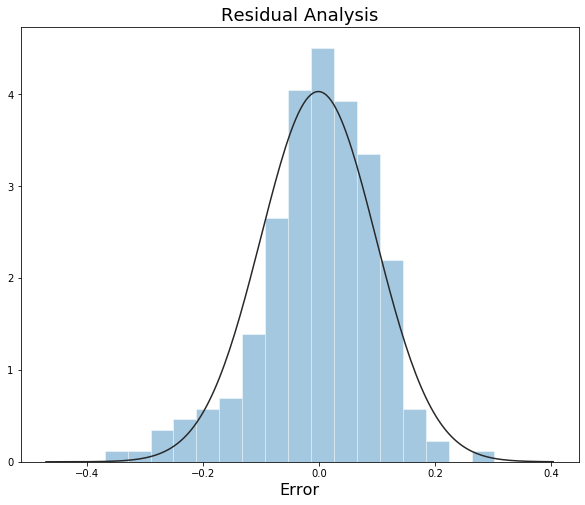

In [131]:
plt.figure(figsize=[10,8])
sns.distplot((y_test-y_pred),fit=norm,kde=False,hist_kws=dict(edgecolor='w'))
plt.xlabel('Error',fontsize=16)
plt.title('Residual Analysis',fontsize=18)

In [132]:
lr_7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     272.9
Date:                Wed, 07 Jul 2021   Prob (F-statistic):          1.37e-186
Time:                        17:18:08   Log-Likelihood:                 491.62
No. Observations:                 510   AIC:                            -963.2
Df Residuals:                     500   BIC:                            -920.9
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            0.1264      0.017      7.541      0.000       0.093       0.159
yr                               0.2328      0.008     27.973      0.000       0.216       0.249
holiday                         -0.0992      0.026     -3.761      0.000      -0.151      -0.047
temp                             0.5480      0.020     27.381      0.000       0.509       0.587
windspeed                       -0.1533      0.025     -6.045      0.000      -0.203      -0.103
summer                           0.0868      0.010      8.307      0.000       0.066       0.107
winter                           0.1306      0.010     12.476      0.000       0.110       0.151
Light Snow_Rain_Thunderstorm    -0.2838      0.025    -11.344      0.000      -0.333      -0.235
Mist_Cloudy                     -0.0797      0.009     -8.995      0.000      -0.097      -0.062
month_9                          0.1011      0.016      6.327      0.000       0.070       0.132
==============================================================================
Omnibus:                       57.277   Durbin-Watson:                   2.088
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              116.021
Skew:                          -0.648   Prob(JB):                     6.40e-26
Kurtosis:                       4.945   Cond. No.                         10.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [133]:
X_train_6.columns

Index(['yr', 'holiday', 'temp', 'windspeed', 'summer', 'winter',
       'Light Snow_Rain_Thunderstorm', 'Mist_Cloudy', 'month_9'],
      dtype='object')

In [134]:
y_p=0.1264+0.2328*X_train_6.iloc[:,0]-0.0992*X_train_6.iloc[:,1]+0.5480*X_train_6.iloc[:,2]-0.1533*X_train_6.iloc[:,3]+0.868*X_train_6.iloc[:,4]+0.1306*X_train_6.iloc[:,5]-0.2838*X_train_6.iloc[:,6]-0.0797*X_train_6.iloc[:,7]+0.1011*X_train_6.iloc[:,8]

Text(0.5, 1.0, 'y_test vs y_pred')

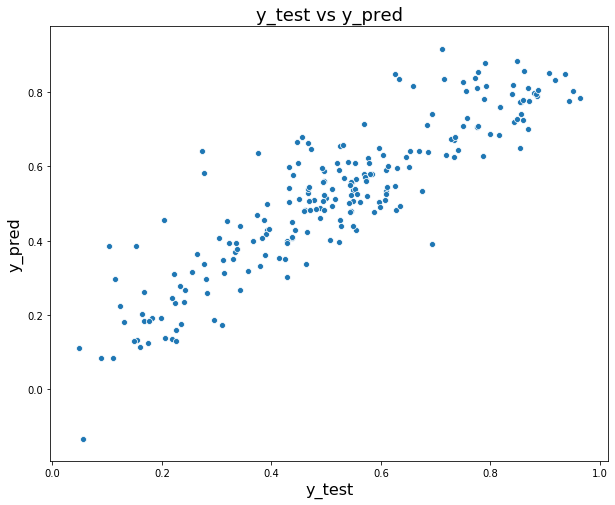

In [135]:
plt.figure(figsize=[10,8])
sns.scatterplot(y_test,y_pred)
plt.xlabel('y_test',fontsize=16)
plt.ylabel('y_pred',fontsize=16)
plt.title('y_test vs y_pred',fontsize=18)

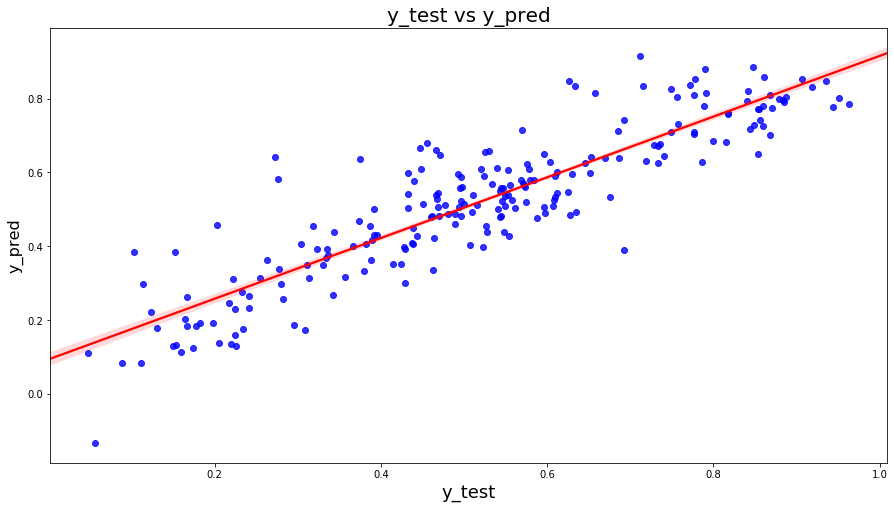

In [136]:
plt.figure(figsize=(15,8))
sns.regplot(x=y_test, y=y_pred, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})

plt.title('y_test vs y_pred', fontsize=20)              
plt.xlabel('y_test', fontsize=18)                          
plt.ylabel('y_pred', fontsize=16)                          
plt.show()

In [137]:
## This model looks good 
## with r2=0.79 for test, 0.82 for training set
## mse= 0.009
## Residual analysis is normally distributed

In [138]:

## Now since we already have seasons, weather listed, only a month's data might not be very significant enough
## Let's check if our assumption is right by dropping the month_9 column

In [139]:
X_train_7=X_train_6.copy()

In [140]:
X_train_7.drop('month_9',axis=1,inplace=True)

In [141]:
X_train_sm=sm.add_constant(X_train_7)
lr_8=sm.OLS(y_train,X_train_sm).fit()
lr_8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     280.1
Date:                Wed, 07 Jul 2021   Prob (F-statistic):          1.72e-179
Time:                        17:18:12   Log-Likelihood:                 471.98
No. Observations:                 510   AIC:                            -926.0
Df Residuals:                     501   BIC:                            -887.9
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            0.1257      0.017      7.221      0.000       0.091       0.160
yr                               0.2320      0.009     26.855      0.000       0.215       0.249
holiday                         -0.0898      0.027     -3.285      0.001      -0.144      -0.036
temp                             0.5752      0.020     28.339      0.000       0.535       0.615
windspeed                       -0.1639      0.026     -6.239      0.000      -0.216      -0.112
summer                           0.0739      0.011      6.939      0.000       0.053       0.095
winter                           0.1273      0.011     11.727      0.000       0.106       0.149
Light Snow_Rain_Thunderstorm    -0.2749      0.026    -10.598      0.000      -0.326      -0.224
Mist_Cloudy                     -0.0751      0.009     -8.185      0.000      -0.093      -0.057
==============================================================================
Omnibus:                       51.763   Durbin-Watson:                   2.018
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              120.606
Skew:                          -0.545   Prob(JB):                     6.47e-27
Kurtosis:                       5.119   Cond. No.                         10.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [142]:
## Adjusted rsquared is affected a little but still this is good 
## Let's try dropping holiday too, as it has little pvalue,
## Also we need to make sure if our model is not overfit as we dropping many columns

In [143]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train_7.columns
vif['VIF'] = [variance_inflation_factor(X_train_7.values, i) for i in range(X_train_7.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,3.33
3,windspeed,3.03
0,yr,2.00
4,summer,1.50
7,Mist_Cloudy,1.47
5,winter,1.37
6,Light Snow_Rain_Thunderstorm,1.08
1,holiday,1.03


In [144]:
X_test=X_test[X_train_7.columns]

In [145]:
X_test_sm=sm.add_constant(X_test)
y_pred=lr_8.predict(X_test_sm)

In [146]:
mean_squared_error(y_test,y_pred)

0.010139057332758243

In [147]:
r2_score(y_test,y_pred)

0.7865273225654599

Text(0.5, 1.0, 'Rsidual Analysis')

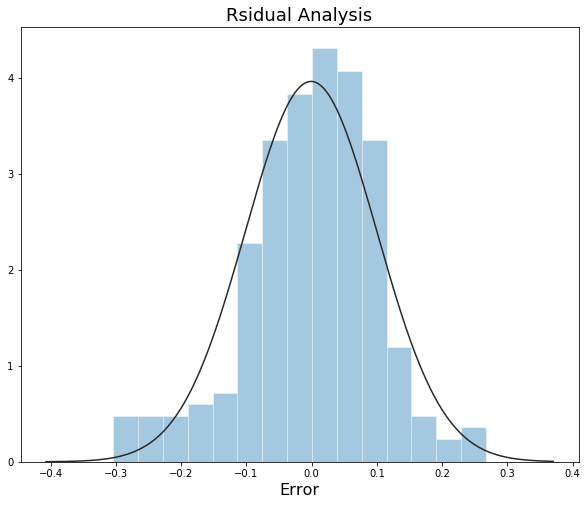

In [148]:
plt.figure(figsize=[10,8])
sns.distplot((y_test-y_pred),hist_kws=dict(edgecolor='w'),fit=norm,kde=False)
plt.xlabel('Error',fontsize=16)
plt.title('Rsidual Analysis',fontsize=18)

Text(0.5, 1.0, 'y_test vs y_pred')

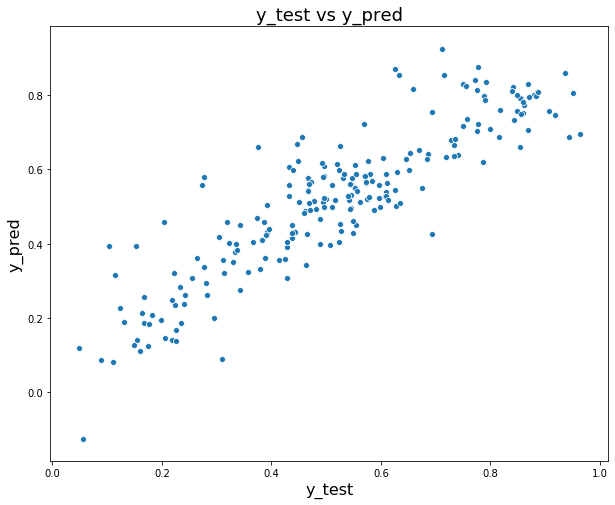

In [149]:
plt.figure(figsize=[10,8])
sns.scatterplot(y_test,y_pred)
plt.xlabel('y_test',fontsize=16)
plt.ylabel('y_pred',fontsize=16)
plt.title('y_test vs y_pred',fontsize=18)

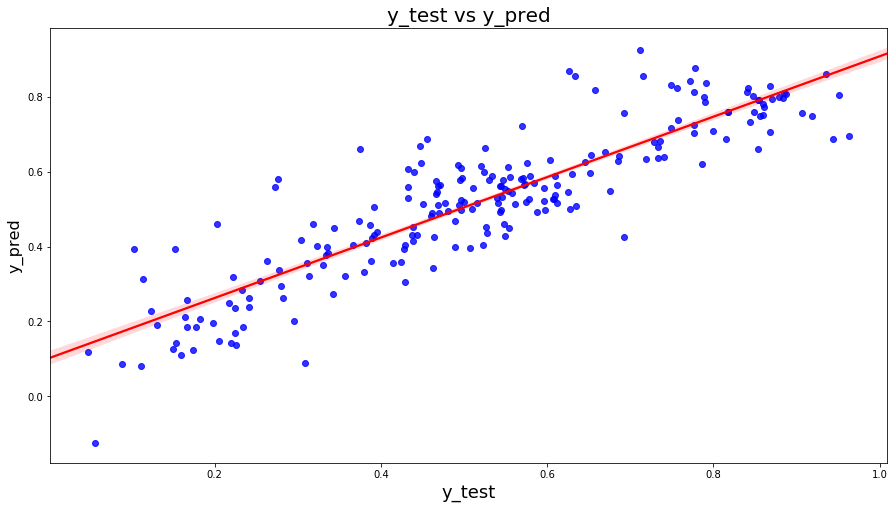

In [150]:
plt.figure(figsize=(15,8))
sns.regplot(x=y_test, y=y_pred, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})

plt.title('y_test vs y_pred', fontsize=20)              
plt.xlabel('y_test', fontsize=18)                          
plt.ylabel('y_pred', fontsize=16)                          
plt.show()

In [151]:
X_train_8=X_train_7.copy()

In [152]:
X_train_8.drop('holiday',axis=1,inplace=True)

In [153]:
X_train_sm=sm.add_constant(X_train_8)
lr_9=sm.OLS(y_train,X_train_sm).fit()
lr_9.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     312.5
Date:                Wed, 07 Jul 2021   Prob (F-statistic):          1.92e-178
Time:                        17:18:15   Log-Likelihood:                 466.55
No. Observations:                 510   AIC:                            -917.1
Df Residuals:                     502   BIC:                            -883.2
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            0.1211      0.018      6.914      0.000       0.087       0.156
yr                               0.2323      0.009     26.635      0.000       0.215       0.249
temp                             0.5786      0.020     28.272      0.000       0.538       0.619
windspeed                       -0.1654      0.027     -6.236      0.000      -0.217      -0.113
summer                           0.0755      0.011      7.029      0.000       0.054       0.097
winter                           0.1263      0.011     11.530      0.000       0.105       0.148
Light Snow_Rain_Thunderstorm    -0.2712      0.026    -10.365      0.000      -0.323      -0.220
Mist_Cloudy                     -0.0737      0.009     -7.963      0.000      -0.092      -0.055
==============================================================================
Omnibus:                       58.136   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              143.406
Skew:                          -0.591   Prob(JB):                     7.24e-32
Kurtosis:                       5.313   Cond. No.                         10.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [154]:
## Let's check VIF again

In [155]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train_8.columns
vif['VIF'] = [variance_inflation_factor(X_train_8.values, i) for i in range(X_train_8.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,3.33
2,windspeed,3.01
0,yr,2.00
3,summer,1.50
6,Mist_Cloudy,1.46
4,winter,1.37
5,Light Snow_Rain_Thunderstorm,1.08


### Model Evaluation

In [156]:
X_test=X_test[X_train_8.columns]

In [157]:
X_test_sm=sm.add_constant(X_test)
y_pred=lr_9.predict(X_test_sm)

In [158]:
mean_squared_error(y_test,y_pred)

0.010377676044333185

In [159]:
r2_score(y_test,y_pred)

0.7815033273779284

Text(0.5, 1.0, 'Residual Analysis')

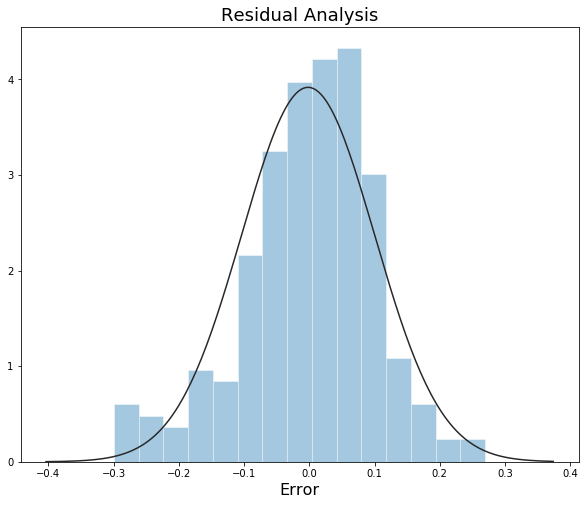

In [160]:
plt.figure(figsize=[10,8])
sns.distplot((y_test-y_pred),hist_kws=dict(edgecolor='w'),fit=norm,kde=False,bins=15)
plt.xlabel('Error',fontsize=16)
plt.title('Residual Analysis',fontsize=18)

Text(0.5, 1.0, 'y_test vs y_pred')

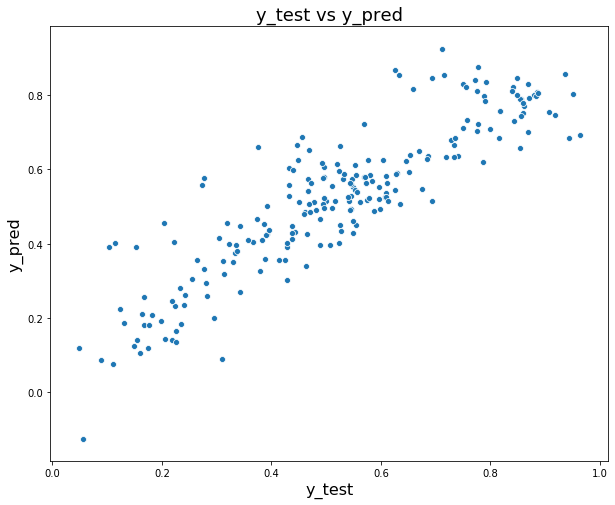

In [161]:
plt.figure(figsize=[10,8])
sns.scatterplot(y_test,y_pred)
plt.xlabel('y_test',fontsize=16)
plt.ylabel('y_pred',fontsize=16)
plt.title('y_test vs y_pred',fontsize=18)

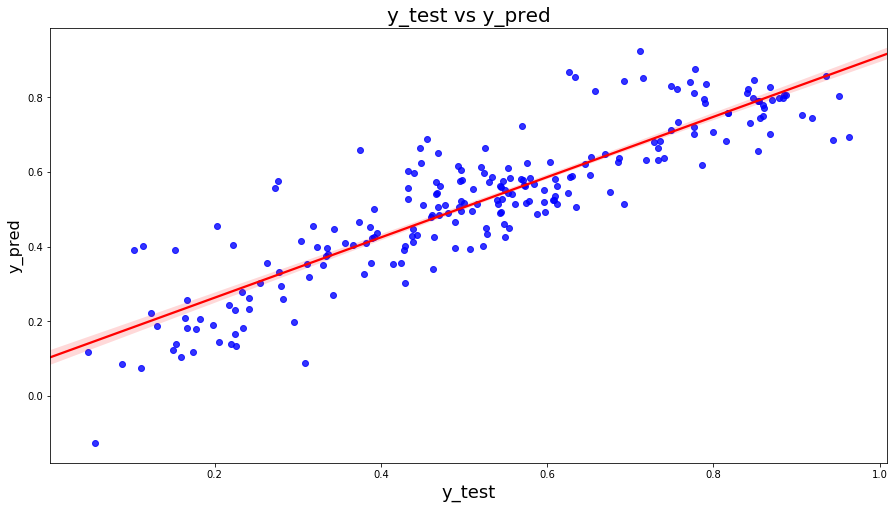

In [162]:
plt.figure(figsize=(15,8))
sns.regplot(x=y_test, y=y_pred, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})

plt.title('y_test vs y_pred', fontsize=20)              
plt.xlabel('y_test', fontsize=18)                          
plt.ylabel('y_pred', fontsize=16)                          
plt.show()

In [163]:
residuals = y_test-y_pred
mean_residuals = np.mean(residuals)
print("Mean of Residuals {}".format(mean_residuals))

Mean of Residuals -0.0019315920640096747


### Observations

In [164]:
## The 7 features used for this model are 
## 'yr', 'temp', 'windspeed', 'summer', 'winter','Light Snow_Rain_Thunderstorm', 'Mist_Cloudy'
## Within given temperature range, demand is directly proportional to the temperature and 
## inversely proportional to rain or thunderstorm which states no rain is preferred more.
## This means that a major portion of people using this retal scheme depends upon season and weather 
## Also we can say less windspeed, no rain and no mist conditions are preferred as they have negative coefficients
## Both summer and winter are preferred but mainly depending on temperature
## However if we wish to choose to have more accuracy then we could choose the above linear models with 2 more features added.
